# Cito Toets 

#### Stap 1 Data verzamelen
* We halen de webpagina op waar eea in wordt uitgelegd, en het excel bestand met alle gegevens.
    * <http://www.rtlnieuws.nl/nieuws/binnenland/hoe-vergelijkt-rtl-nieuws-de-cito-scores-van-2014>
    * <http://www.rtlnieuws.nl/sites/default/files/content/documents/2014/07/07/scholenoverzicht_0.xls>
    
#### Stap 2 Inlezen in pandas, en wat eerste exploratie
* Hier wordt het prima uitgelegd:
    * <http://pbpython.com/pandas-pivot-table-explained.html>

#### Stap 3 Analyse

# Data verzamelen

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
scholenoverzicht = pd.read_excel("http://maartenmarx.nl/teaching/ISatWork/Data/CitoToets/scholenoverzicht_0.xls")
scholenoverzicht.head()

,BRIN,Vestiging,id,naam,adres,postcode,plaats,gemeente,provincie,denominatie,...,tellerdeelname,noemerdeelname,deelnaamper,meantoets,waretoets,RES1,PRED1,quasicito,verwacht,cijfer
0,23EK,0,23EK00,De Phoenix,Zalmkolk 2,8017 PA,Zwolle,Zwolle,Overijssel,Rooms-Katholiek,...,,,,,,,0.910815,NaN,537.351861,-
1,09CA,0,09CA00,Jan Jaspers,de Meenthe 28,8051 KV,Hattem,Hattem,Gelderland,Protestants-Christelijk,...,29,29,100,-0.46357,-0.46357,-1.01519,0.551622,531.447503,535.808769,-
2,30RP,0,30RP00,De Verbinding,Jan Greshoffstraat 5,3069 WG,Rotterdam,Rotterdam,Zuid-Holland,Algemeen Bijzonder,...,,,,,,,0.178813,NaN,534.207181,-
3,30PN,0,30PN00,EBS Tabitha,Jachthoornlaan 15,7312 CD,Apeldoorn,Apeldoorn,Gelderland,Evangelisch,...,,,,,,,0.415624,NaN,535.224522,-
4,15UF,0,15UF00,obs De Springplank,Beukenstraat 83,8021 XA,Zwolle,Zwolle,Overijssel,Openbaar,...,20.5,23.5,87.234,0.222755,-0.0580963,0.763355,-0.821451,533.189418,529.910046,7.76335


In [3]:
scholenoverzicht_toetsen = scholenoverzicht[['BRIN', 'naam', 'adres', 'postcode', 'plaats', 'gemeente', 'provincie',\
                                     'denominatie', 'visie', 'TOETS_2012', 'SCORE_2012', 'TOETS_2013', 'SCORE_2013', 'TOETS_2014', 'SCORE_2014']]
scholenoverzicht_toetsen.head()

,BRIN,naam,adres,postcode,plaats,gemeente,provincie,denominatie,visie,TOETS_2012,SCORE_2012,TOETS_2013,SCORE_2013,TOETS_2014,SCORE_2014
0,23EK,De Phoenix,Zalmkolk 2,8017 PA,Zwolle,Zwolle,Overijssel,Rooms-Katholiek,Regulier,NaN,,NaN,,andere,
1,09CA,Jan Jaspers,de Meenthe 28,8051 KV,Hattem,Hattem,Gelderland,Protestants-Christelijk,Regulier,NaN,,NaN,,seo,-0.57
2,30RP,De Verbinding,Jan Greshoffstraat 5,3069 WG,Rotterdam,Rotterdam,Zuid-Holland,Algemeen Bijzonder,Regulier,NaN,,NaN,,NaN,
3,30PN,EBS Tabitha,Jachthoornlaan 15,7312 CD,Apeldoorn,Apeldoorn,Gelderland,Evangelisch,Regulier,NaN,,NaN,,andere,
4,15UF,obs De Springplank,Beukenstraat 83,8021 XA,Zwolle,Zwolle,Overijssel,Openbaar,Regulier,NaN,,SEO,-0.43,seo,0.81


In [4]:
scholenoverzicht_cito = scholenoverzicht_toetsen[(scholenoverzicht_toetsen.TOETS_2012 =='cito') & \
                                                    (scholenoverzicht_toetsen.TOETS_2013 =='cito') & \
                                                    (scholenoverzicht_toetsen.TOETS_2014 =='cito')]

scholenoverzicht_cito.head()

,BRIN,naam,adres,postcode,plaats,gemeente,provincie,denominatie,visie,TOETS_2012,SCORE_2012,TOETS_2013,SCORE_2013,TOETS_2014,SCORE_2014
207,07OL,Rotterdamse Schoolvereniging II,Stuart Millpad 84,3076 RK,Rotterdam,Rotterdam,Zuid-Holland,Algemeen Bijzonder,Regulier,cito,546.4,cito,543.5,cito,545.2
208,08XI,Rotterdamse Schoolvereniging Noord,Schiedamsesingel 155,3012 BB,Rotterdam,Rotterdam,Zuid-Holland,Algemeen Bijzonder,Regulier,cito,540.5,cito,543.2,cito,541.2
209,16KZ,Professor Wassenberghschool,Ieborchpaed 6,9081 AR,Lekkum,Leeuwarden,Friesland,Openbaar,Regulier,cito,535,cito,532.8,cito,521.5
210,03HI,de Gereformeerde b.s. Rehoboth,Pompenburgsingel 30,3135 PS,Vlaardingen,Vlaardingen,Zuid-Holland,Gereformeerd Vrijgemaakt,Regulier,cito,535.7,cito,537.2,cito,535.1
211,03BA,Basisschool Jan van Rijckenborgh,'s-Gravesandelaan 15,1222 SX,Hilversum,Hilversum,Noord-Holland,Algemeen Bijzonder,Regulier,cito,540.2,cito,545.8,cito,531.8


In [5]:
scholenoverzicht_citoscores = scholenoverzicht_cito.drop(['TOETS_2012', 'TOETS_2013', 'TOETS_2014'], axis=1).rename(columns = {'BRIN':'BRIN NUMMER'})
scholenoverzicht_citoscores.head()

,BRIN NUMMER,naam,adres,postcode,plaats,gemeente,provincie,denominatie,visie,SCORE_2012,SCORE_2013,SCORE_2014
207,07OL,Rotterdamse Schoolvereniging II,Stuart Millpad 84,3076 RK,Rotterdam,Rotterdam,Zuid-Holland,Algemeen Bijzonder,Regulier,546.4,543.5,545.2
208,08XI,Rotterdamse Schoolvereniging Noord,Schiedamsesingel 155,3012 BB,Rotterdam,Rotterdam,Zuid-Holland,Algemeen Bijzonder,Regulier,540.5,543.2,541.2
209,16KZ,Professor Wassenberghschool,Ieborchpaed 6,9081 AR,Lekkum,Leeuwarden,Friesland,Openbaar,Regulier,535,532.8,521.5
210,03HI,de Gereformeerde b.s. Rehoboth,Pompenburgsingel 30,3135 PS,Vlaardingen,Vlaardingen,Zuid-Holland,Gereformeerd Vrijgemaakt,Regulier,535.7,537.2,535.1
211,03BA,Basisschool Jan van Rijckenborgh,'s-Gravesandelaan 15,1222 SX,Hilversum,Hilversum,Noord-Holland,Algemeen Bijzonder,Regulier,540.2,545.8,531.8


In [131]:
scholenoverzicht2015 = pd.read_excel("RTLNieuwseindtoetscijfers2015.xls")
scholenoverzicht_toetsen2015 = scholenoverzicht2015[['BRIN_NUMMER', 'TOETS_2015', 'SCORE_2015', 'quasicito']]
scholenoverzicht_cito2015 = scholenoverzicht_toetsen2015[scholenoverzicht_toetsen2015.TOETS_2015 == 'Cito']
scholenoverzicht_citoscores2015 = scholenoverzicht_cito2015.drop(['TOETS_2015'], axis=1).rename(columns = {'BRIN_NUMMER':'BRIN NUMMER'})
scholenoverzicht_citoscores2015.head()
scholenoverzicht_citoscores_15 = pd.merge(scholenoverzicht_citoscores,scholenoverzicht_citoscores2015,on='BRIN NUMMER')
scholenoverzicht_citoscores_15.head()

,BRIN NUMMER,naam,adres,postcode,plaats,gemeente,provincie,denominatie,visie,SCORE_2012,SCORE_2013,SCORE_2014,SCORE_2015,quasicito
0,07OL,Rotterdamse Schoolvereniging II,Stuart Millpad 84,3076 RK,Rotterdam,Rotterdam,Zuid-Holland,Algemeen Bijzonder,Regulier,546.4,543.5,545.2,540.4,543.032709
1,08XI,Rotterdamse Schoolvereniging Noord,Schiedamsesingel 155,3012 BB,Rotterdam,Rotterdam,Zuid-Holland,Algemeen Bijzonder,Regulier,540.5,543.2,541.2,541.6,542.069518
2,16KZ,Professor Wassenberghschool,Ieborchpaed 6,9081 AR,Lekkum,Leeuwarden,Friesland,Openbaar,Regulier,535,532.8,521.5,534.7,530.164578
3,03HI,de Gereformeerde b.s. Rehoboth,Pompenburgsingel 30,3135 PS,Vlaardingen,Vlaardingen,Zuid-Holland,Gereformeerd Vrijgemaakt,Regulier,535.7,537.2,535.1,538.6,537.214579
4,03BA,Basisschool Jan van Rijckenborgh,'s-Gravesandelaan 15,1222 SX,Hilversum,Hilversum,Noord-Holland,Algemeen Bijzonder,Regulier,540.2,545.8,531.8,NaN,538.992056


In [132]:
xl_file = pd.ExcelFile('02. Onderwijspersoneel po in fte - 2010-2014.xls', axis=0)

dfs = {sheet_name: xl_file.parse(sheet_name)
       for sheet_name in xl_file.sheet_names}

pers_fte = dfs['per owtype-bestuur-brin-functie'][["BRIN NUMMER", "FUNCTIEGROEP", "FTE'S 2012", "FTE'S 2013", "FTE'S 2014"]]
pers_fte_onderwijsgevend = pers_fte[pers_fte.FUNCTIEGROEP == 'Onderwijsgevend personeel']
pers_fte_onderwijsgevend.head(30)

,BRIN NUMMER,FUNCTIEGROEP,FTE'S 2012,FTE'S 2013,FTE'S 2014
1,16AH,Onderwijsgevend personeel,10.0345,9.1019,10.2489
3,16BX,Onderwijsgevend personeel,3.7861,3.7830,3.7830
6,16DJ,Onderwijsgevend personeel,4.0894,4.6451,4.7808
8,16HI,Onderwijsgevend personeel,8.0842,6.7786,6.6984
10,16MA,Onderwijsgevend personeel,25.5978,23.5600,25.1079
13,16NR,Onderwijsgevend personeel,11.4994,15.2640,12.1381
15,16UA,Onderwijsgevend personeel,9.5409,9.4522,8.4784
18,16WN,Onderwijsgevend personeel,5.5566,4.7336,3.7220
21,16XQ,Onderwijsgevend personeel,16.0790,15.7023,18.3906
24,16YK,Onderwijsgevend personeel,6.1597,6.1597,6.2530


In [10]:
leerlingen1213 = pd.read_excel("01. Leerlingen bo - leerlinggewicht en schoolgewicht- 2012-2013.xls")
leerlingen1213_tot = leerlingen1213[['BRIN NUMMER', 'TOTAAL']]
leerlingen1213_tot = leerlingen1213_tot.rename(columns = {'TOTAAL':'TOTAAL 2012-2013'})
leerlingen1314 = pd.read_excel("01. Leerlingen bo - leerlinggewicht en schoolgewicht- 2013-2014.xls")
leerlingen1314_tot = leerlingen1314[['BRIN NUMMER', 'TOTAAL']]
leerlingen1314_tot = leerlingen1314_tot.rename(columns = {'TOTAAL':'TOTAAL 2013-2014'})
leerlingen1415 = pd.read_excel("01. Leerlingen bo - leerlinggewicht en schoolgewicht- 2014-2015.xls")
leerlingen1415_tot = leerlingen1415[['BRIN_NUMMER', 'TOTAAL']]
leerlingen1415_tot = leerlingen1415_tot.rename(columns = {'TOTAAL':'TOTAAL 2014-2015'})
leerlingen1415_tot = leerlingen1415_tot.rename(columns = {'BRIN_NUMMER':'BRIN NUMMER'})

In [108]:
#Totaal aantal leerlingen per BRIN, duplicaten verwijderd en gemiddelde genomen
leerlingen_tot = pd.merge(pd.merge(leerlingen1213_tot,leerlingen1314_tot,on='BRIN NUMMER'),leerlingen1415_tot,on='BRIN NUMMER')
leerlingen_tot_dupl = leerlingen_tot.drop_duplicates(subset = ['BRIN NUMMER', 'TOTAAL 2012-2013'])
leerlingen_tot_dupl= leerlingen_tot.groupby(['BRIN NUMMER']).mean().reset_index()
leerlingen_tot_dupl.head()

,BRIN NUMMER,TOTAAL 2012-2013,TOTAAL 2013-2014,TOTAAL 2014-2015
0,00AP,94,96,88
1,00AR,150,143,141
2,00AV,58,58,59
3,00AZ,77,79,133
4,00BA,117,113,106


In [109]:
fte_leerlingen = pd.merge(leerlingen_tot_dupl, pers_fte_onderwijsgevend,on='BRIN NUMMER')
fte_leerlingen = fte_leerlingen.drop('FUNCTIEGROEP', axis=1)
fte_leerlingen.head()

,BRIN NUMMER,TOTAAL 2012-2013,TOTAAL 2013-2014,TOTAAL 2014-2015,FTE'S 2012,FTE'S 2013,FTE'S 2014
0,00AP,94,96,88,3.6178,4.0381,4.1248
1,00AR,150,143,141,7.8546,7.9405,8.0966
2,00AV,58,58,59,3.7080,4.0251,4.6444
3,00AZ,77,79,133,10.9558,8.6015,8.0380
4,00BA,117,113,106,6.3295,7.0346,6.3348


In [110]:
fte_leerlingen['Leerlingen per fte 2012-2013'] = fte_leerlingen['TOTAAL 2012-2013'] / fte_leerlingen["FTE'S 2012"]
fte_leerlingen['Leerlingen per fte 2013-2014'] = fte_leerlingen['TOTAAL 2013-2014'] / fte_leerlingen["FTE'S 2013"]
fte_leerlingen['Leerlingen per fte 2014-2015'] = fte_leerlingen['TOTAAL 2014-2015'] / fte_leerlingen["FTE'S 2014"]

In [111]:
fte_leerlingen_av = fte_leerlingen[['BRIN NUMMER', 'Leerlingen per fte 2012-2013', 'Leerlingen per fte 2013-2014', 'Leerlingen per fte 2014-2015']]
fte_leerlingen_av.head()

,BRIN NUMMER,Leerlingen per fte 2012-2013,Leerlingen per fte 2013-2014,Leerlingen per fte 2014-2015
0,00AP,25.982641,23.773557,21.334368
1,00AR,19.097090,18.008942,17.414717
2,00AV,15.641855,14.409580,12.703471
3,00AZ,7.028241,9.184445,16.546405
4,00BA,18.484872,16.063458,16.732967


In [136]:
#Samenvoegen citoscores en aantal leerlingen per fte
fte_cito = pd.merge(scholenoverzicht_citoscores_15, fte_leerlingen_av, on='BRIN NUMMER')
fte_cito.head()

,BRIN NUMMER,naam,adres,postcode,plaats,gemeente,provincie,denominatie,visie,SCORE_2012,SCORE_2013,SCORE_2014,SCORE_2015,quasicito,Leerlingen per fte 2012-2013,Leerlingen per fte 2013-2014,Leerlingen per fte 2014-2015
0,07OL,Rotterdamse Schoolvereniging II,Stuart Millpad 84,3076 RK,Rotterdam,Rotterdam,Zuid-Holland,Algemeen Bijzonder,Regulier,546.4,543.5,545.2,540.4,543.032709,19.827877,20.093074,19.976239
1,08XI,Rotterdamse Schoolvereniging Noord,Schiedamsesingel 155,3012 BB,Rotterdam,Rotterdam,Zuid-Holland,Algemeen Bijzonder,Regulier,540.5,543.2,541.2,541.6,542.069518,17.270137,19.417168,20.138852
2,16KZ,Professor Wassenberghschool,Ieborchpaed 6,9081 AR,Lekkum,Leeuwarden,Friesland,Openbaar,Regulier,535,532.8,521.5,534.7,530.164578,25.194205,22.782349,23.824626
3,03HI,de Gereformeerde b.s. Rehoboth,Pompenburgsingel 30,3135 PS,Vlaardingen,Vlaardingen,Zuid-Holland,Gereformeerd Vrijgemaakt,Regulier,535.7,537.2,535.1,538.6,537.214579,20.540911,20.425671,18.835182
4,03BA,Basisschool Jan van Rijckenborgh,'s-Gravesandelaan 15,1222 SX,Hilversum,Hilversum,Noord-Holland,Algemeen Bijzonder,Regulier,540.2,545.8,531.8,NaN,538.992056,19.320171,14.965382,15.344614


## Correlatie tussen cito score en aantal fte per leerling

Pearson Correlation (R)


C:\Users\Eline\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,SCORE_2013,Leerlingen per fte 2012-2013
SCORE_2013,1.000000,0.217687
Leerlingen per fte 2012-2013,0.217687,1.000000


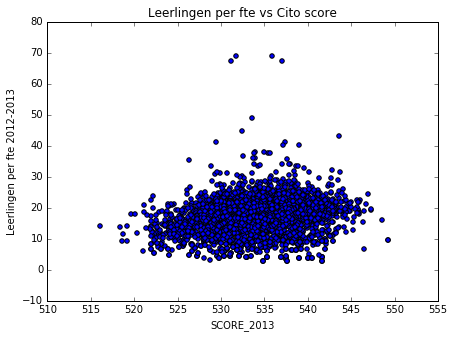

In [175]:
cito_fte_corr12 = fte_cito[['SCORE_2013','Leerlingen per fte 2012-2013']]
cito_fte_corr12['SCORE_2013'] = pd.to_numeric(cito_fte_corr12['SCORE_2013'], errors='coerce')

## Correlatie tussen cito score en Leerlingen per fte
cito_fte_corr12.plot(kind='scatter', figsize=(7, 5), x = 'SCORE_2013', y = 'Leerlingen per fte 2012-2013', title= 'Leerlingen per fte vs Cito score')

# Correlation
print 'Pearson Correlation (R)'
cito_fte_corr12.corr(method='pearson')

Pearson Correlation (R)


C:\Users\Eline\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,SCORE_2014,Leerlingen per fte 2013-2014
SCORE_2014,1.000000,0.224235
Leerlingen per fte 2013-2014,0.224235,1.000000


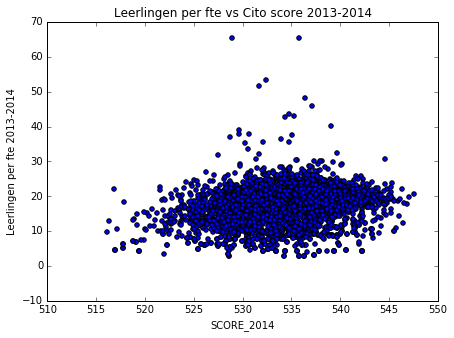

In [174]:
cito_fte_corr1314 = fte_cito[['SCORE_2014','Leerlingen per fte 2013-2014']]
cito_fte_corr1314['SCORE_2014'] = pd.to_numeric(cito_fte_corr1314['SCORE_2014'], errors='coerce')

## Correlatie tussen cito score en Leerlingen per fte
cito_fte_corr1314.plot(kind='scatter', figsize=(7, 5), x = 'SCORE_2014', y = 'Leerlingen per fte 2013-2014', title= 'Leerlingen per fte vs Cito score 2013-2014')

# Correlation
print 'Pearson Correlation (R)'
cito_fte_corr1314.corr(method='pearson')

Pearson Correlation (R)


C:\Users\Eline\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,SCORE_2015,Leerlingen per fte 2014-2015
SCORE_2015,1.000000,0.175474
Leerlingen per fte 2014-2015,0.175474,1.000000


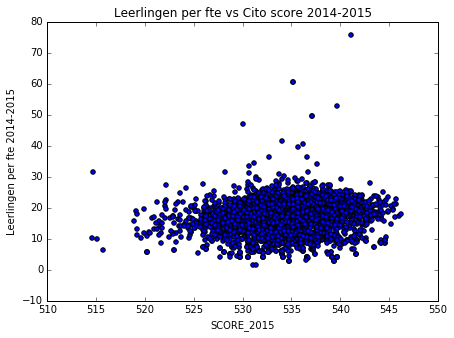

In [173]:
cito_fte_corr1415 = fte_cito[['SCORE_2015','Leerlingen per fte 2014-2015']]
cito_fte_corr1415['SCORE_2015'] = pd.to_numeric(cito_fte_corr1415['SCORE_2015'], errors='coerce')

## Correlatie tussen cito score en Leerlingen per fte
cito_fte_corr1415.plot(kind='scatter', figsize=(7, 5), x = 'SCORE_2015', y = 'Leerlingen per fte 2014-2015', title= 'Leerlingen per fte vs Cito score 2014-2015')

# Correlation
print 'Pearson Correlation (R)'
cito_fte_corr1415.corr(method='pearson')

In [27]:
cito_fte_corr1314.describe()

,SCORE_2014,Leerlingen per fte 2013-2014
count,7220.000000,7390.000000
mean,534.087715,inf
std,4.859711,NaN
min,516.100000,0.112926
25%,531.600000,9.612170
50%,534.600000,17.287679
75%,537.200000,20.184349
max,547.500000,inf


In [144]:
fte_cito['SCORE_2013'] = pd.to_numeric(fte_cito['SCORE_2013'], errors='coerce')
fte_cito['SCORE_2014'] = pd.to_numeric(fte_cito['SCORE_2014'], errors='coerce')
fte_cito['SCORE_2015'] = pd.to_numeric(fte_cito['SCORE_2015'], errors='coerce')

fte_cito_visie = pd.pivot_table(fte_cito,index=["visie"])
fte_cito_visie

,Leerlingen per fte 2012-2013,Leerlingen per fte 2013-2014,Leerlingen per fte 2014-2015,SCORE_2013,SCORE_2014,SCORE_2015,quasicito
visie,,,,,,,
Dalton / Jenaplan,inf,inf,17.625760,534.577358,534.486538,535.415217,534.814785
Eigen tempo werkwijze,17.949327,17.612481,35.182348,538.300000,537.150000,533.700000,536.551059
Ervaringsgericht onderwijs,20.391497,20.155950,21.464611,531.866667,536.000000,534.066667,534.268830
Freinet,19.700331,20.368201,20.929658,537.066667,539.866667,537.833333,538.404968
Gecertificeerde Daltonschool,18.399100,inf,18.413440,534.967213,535.126230,535.221008,535.243580
Gecertificeerde Jenaplanschool,18.991743,19.563172,19.603283,534.712903,534.862903,535.414545,535.418800
Gecertificeerde Montessorischool,16.368901,inf,inf,536.377966,536.124576,535.575652,536.244762
Jenaplan / Montessori,18.548080,18.745807,19.021564,535.800000,535.200000,537.420000,536.095639
Nieuw leren/natuurlijk leren/competentie,18.697901,18.185782,16.912791,535.400000,533.460000,536.280000,535.332206


In [145]:
fte_cito_visie2 = fte_cito_visie.reset_index()

maxll13 = fte_cito_visie2[fte_cito_visie2['SCORE_2013'] == fte_cito_visie2['SCORE_2013'].max()]
max_no13 = maxll13.get_value(maxll13.index[0],'SCORE_2013')
visie_high13 = maxll13.get_value(maxll13.index[0],'visie')
print 'De visie met de hoogste cito score in 2013 is', visie_high13

maxll14 = fte_cito_visie2[fte_cito_visie2['SCORE_2014'] == fte_cito_visie2['SCORE_2014'].max()]
max_no14 = maxll14.get_value(maxll14.index[0],'SCORE_2014')
visie_high14 = maxll14.get_value(maxll14.index[0],'visie')
print 'De visie met de hoogste cito score in 2014 is', visie_high14

maxll15 = fte_cito_visie2[fte_cito_visie2['SCORE_2015'] == fte_cito_visie2['SCORE_2015'].max()]
max_no15 = maxll15.get_value(maxll15.index[0],'SCORE_2015')
visie_high15 = maxll15.get_value(maxll15.index[0],'visie')
print 'De visie met de hoogste cito score in 2015 is', visie_high15

fte_cito_prov3 = fte_cito_visie2.replace(np.inf, np.nan)

maxll_fte12 = fte_cito_prov3[fte_cito_prov3['Leerlingen per fte 2012-2013'] == fte_cito_prov3['Leerlingen per fte 2012-2013'].min()]
max_no_fte12 = maxll_fte12.get_value(maxll_fte12.index[0],'Leerlingen per fte 2012-2013')
visie_ftelow12 = maxll_fte12.get_value(maxll_fte12.index[0],'visie')
print 'De visie met het minste aantal leerlingen per fte in 2012-2013 is', visie_ftelow12

maxll_fte13 = fte_cito_prov3[fte_cito_prov3['Leerlingen per fte 2013-2014'] == fte_cito_prov3['Leerlingen per fte 2013-2014'].min()]
max_no_fte13 = maxll_fte13.get_value(maxll_fte13.index[0],'Leerlingen per fte 2013-2014')
visie_ftelow13 = maxll_fte13.get_value(maxll_fte13.index[0],'visie')
print 'De visie met het minste aantal leerlingen per fte in 2013-2014 is', visie_ftelow13

maxll_fte14 = fte_cito_prov3[fte_cito_prov3['Leerlingen per fte 2014-2015'] == fte_cito_prov3['Leerlingen per fte 2014-2015'].min()]
max_no_fte14 = maxll_fte14.get_value(maxll_fte14.index[0],'Leerlingen per fte 2014-2015')
visie_ftelow14 = maxll_fte14.get_value(maxll_fte14.index[0],'visie')
print 'De visie met het minste aantal leerlingen per fte in 2014-2015 is', visie_ftelow14

De visie met de hoogste cito score in 2013 is Eigen tempo werkwijze
De visie met de hoogste cito score in 2014 is Freinet
De visie met de hoogste cito score in 2015 is Freinet
De visie met het minste aantal leerlingen per fte in 2012-2013 is Gecertificeerde Montessorischool
De visie met het minste aantal leerlingen per fte in 2013-2014 is Eigen tempo werkwijze
De visie met het minste aantal leerlingen per fte in 2014-2015 is Nieuw leren/natuurlijk leren/competentie


Pearson Correlation (R)


,stad,quasicito
stad,1.000000,-0.154738
quasicito,-0.154738,1.000000


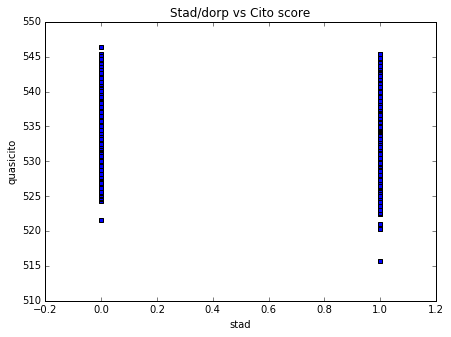

In [170]:
steden = pd.read_excel("Steden_NL.xls")
scholenoverzicht_citoscores_15['stad'] = scholenoverzicht_citoscores_15.plaats.isin(steden.Steden)
scholenoverzicht_citoscores_15['stad'] = scholenoverzicht_citoscores_15['stad'].astype(float)
cito_stadcorr = scholenoverzicht_citoscores_15[['stad', 'quasicito']]

## Correlatie tussen cito score en Stad/dorp
cito_stadcorr.plot(kind='scatter', marker='s', figsize=(7, 5), x = 'stad', y = 'quasicito', title= 'Stad/dorp vs Cito score')

# Correlation
print 'Pearson Correlation (R)'
cito_stadcorr.corr(method='pearson')

In [171]:
cito_steden = cito_stadcorr[cito_stadcorr.stad == 1]
cito_steden = cito_steden.rename(columns = {'quasicito':'quasicito stad'})
cito_dorpen = cito_stadcorr[cito_stadcorr.stad == 0]
cito_dorpen = cito_dorpen.rename(columns = {'stad':'dorp', 'quasicito':'quasicito dorp'})
dorpstad = pd.concat([cito_steden,cito_dorpen], axis=1)
dorpstad.describe()

,stad,quasicito stad,dorp,quasicito dorp
count,1661,1659.000000,3630,3617.000000
mean,1,534.265856,0,535.388344
std,0,3.990125,0,2.975702
min,1,515.700000,0,521.598513
25%,1,531.753215,0,533.686749
50%,1,534.648445,0,535.520103
75%,1,536.904547,0,537.253814
max,1,545.436401,0,546.373427


In [ ]:
scholenoverzicht_citoscores_15 = pd.merge(scholenoverzicht_citoscores,scholenoverzicht_citoscores2015,on='BRIN NUMMER')

# **Cito toets**

*Dylan Wijman*

*Sjoerd Paardekooper*

*Eline Steensma*

<img src='http://laetare.nl/wp-content/uploads/2013/01/CITO-logo.jpg'>

## Inhoud

### Inleiding
### Gebruikte datasets
### Resultaten
### Conclusie

## Inleiding
- Scholen promoten met persoonlijke aandacht


## Gebruikte datasets
### RTL nieuws
- scholenoverzicht_0.xls
- RTLNieuwseindtoetscijfers2015.xls

### Duo open data
*Leerling informatie*
- Leerlingen bo - leerlinggewicht en schoolgewicht- 2012-2013.xls
- Leerlingen bo - leerlinggewicht en schoolgewicht- 2013-2014.xls
- Leerlingen bo - leerlinggewicht en schoolgewicht- 2014-2015.xls

*Personeel informatie*
- Onderwijspersoneel po in fte - 2010-2014.xls

### Wikipedia
- Lijst van Nederlandse steden

## Resultaten

#### Correlaties tussen de citoscores en het aantal leerlingen per fte
#### Vergelijken verschillende visies van onderwijs citoscores en het aantal leerlingen per fte
#### Vergelijken quasicito scores dorpen en steden

## Correlaties tussen de citoscores en het aantal leerlingen per fte

Pearson Correlation (R)


,SCORE_2013,Leerlingen per fte 2012-2013
SCORE_2013,1.000000,0.217687
Leerlingen per fte 2012-2013,0.217687,1.000000


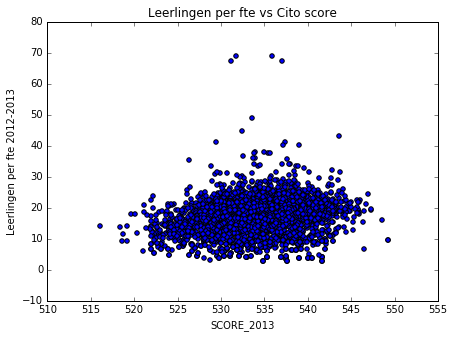

In [177]:
cito_fte_corr12.plot(kind='scatter', figsize=(7, 5), x = 'SCORE_2013', y = 'Leerlingen per fte 2012-2013', title= 'Leerlingen per fte vs Cito score')

print 'Pearson Correlation (R)'
cito_fte_corr12.corr(method='pearson')

Pearson Correlation (R)


,SCORE_2014,Leerlingen per fte 2013-2014
SCORE_2014,1.000000,0.224235
Leerlingen per fte 2013-2014,0.224235,1.000000


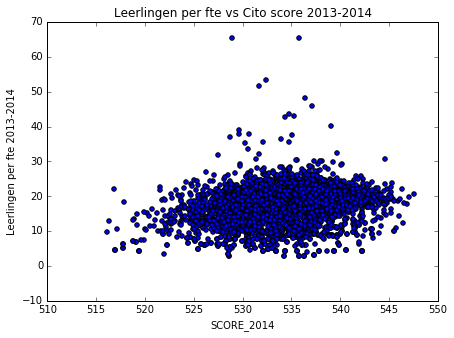

In [180]:
cito_fte_corr1314.plot(kind='scatter', figsize=(7, 5), x = 'SCORE_2014', y = 'Leerlingen per fte 2013-2014', title= 'Leerlingen per fte vs Cito score 2013-2014')

print 'Pearson Correlation (R)'
cito_fte_corr1314.corr(method='pearson')


Pearson Correlation (R)


,SCORE_2015,Leerlingen per fte 2014-2015
SCORE_2015,1.000000,0.175474
Leerlingen per fte 2014-2015,0.175474,1.000000


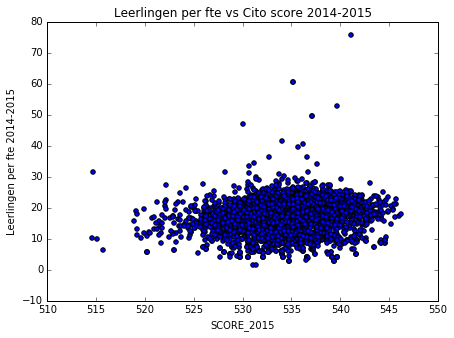

In [179]:

cito_fte_corr1415.plot(kind='scatter', figsize=(7, 5), x = 'SCORE_2015', y = 'Leerlingen per fte 2014-2015', title= 'Leerlingen per fte vs Cito score 2014-2015')

print 'Pearson Correlation (R)'
cito_fte_corr1415.corr(method='pearson')